In [1]:
from pathlib import Path
import pandas as pd

# Path 정리
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
BASE_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/ASAN_01_mini_yolo_finetuning/")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 불러오기
df = pd.read_csv(CSV_PATH)

target = 1                              # 원하는 행 인덱스 설정

COMMON_PATH = df.loc[target,"common_path"]   # COMMON_PATH 추출
VIDEO_PTH = df.loc[target,"video_path"]
FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH          # 프레임 디렉토리 경로 설정
KPT_DIR = DATA_DIR / "2_KEYPOINTS" / COMMON_PATH        # 키포인트 디렉토리 경로 설정
MP4_DIR = DATA_DIR / "3_MP4" / f"{COMMON_PATH}.mp4"              # MP4 디렉토리 경로 설정    
INTERP_DIR = DATA_DIR / "4_INTERP_DATA" /COMMON_PATH    # 보간 데이터 디렉토리 경로 설정
YOLO_DIR = DATA_DIR / "5_YOLO_TXT" / COMMON_PATH     # YOLO TXT 디렉토리 경로 설정

OUTPUT_PATH = DATA_DIR / "test"

# 경로 출력
print(" BASE_DIR:", BASE_DIR,"\n FRAME_DIR:", FRAME_DIR, "\n KPT_DIR:", KPT_DIR, "\n MP4_DIR:", MP4_DIR, "\n INTERP_DIR:", INTERP_DIR)
print("IS_TRAIN:", df.loc[target,"is_train"])

 BASE_DIR: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/ASAN_01_mini_yolo_finetuning 
 FRAME_DIR: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/1_FRAME/AI_dataset/N01/N01_Treatment/diagonal__hip_extension 
 KPT_DIR: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/2_KEYPOINTS/AI_dataset/N01/N01_Treatment/diagonal__hip_extension 
 MP4_DIR: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/3_MP4/AI_dataset/N01/N01_Treatment/diagonal__hip_extension.mp4 
 INTERP_DIR: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/4_INTERP_DATA/AI_dataset/N01/N01_Treatment/diagonal__hip_extension
IS_TRAIN: True


In [2]:
import sys
sys.path.append(str(BASE_DIR))
from funcs.data_utils import convert_json_to_yolo_kpt_fixed, create_yolo_dataset_structure

# JSON2TXT
파이썬 파일 runner로 변경 완료

In [ ]:
# import json
# import cv2
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from tqdm import tqdm

# # ==========================================
# # 1. 경로 설정 (기존과 동일)
# # ==========================================
# DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
# CSV_PATH = DATA_DIR / "metadata.csv"

# df = pd.read_csv(CSV_PATH)
# target_row = df[df['is_train'] == True].iloc[1]

# COMMON_PATH = target_row['common_path']
# FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
# INTERP_DIR = DATA_DIR / "4_INTERP_DATA" / COMMON_PATH
# YOLO_DIR = DATA_DIR / "5_YOLO_TXT" / COMMON_PATH

# print(f"🧪 [TEST START] 타겟 경로: {COMMON_PATH}")
# print(f"📂 저장 위치: {YOLO_DIR}")

# # ==========================================
# # 3. 실행
# # ==========================================

# YOLO_DIR.mkdir(parents=True, exist_ok=True)

# img_files = list(FRAME_DIR.glob("*.jpg")) + list(FRAME_DIR.glob("*.png"))

# if not img_files:
#     print("❌ 이미지가 없습니다.")
# else:
#     sample_img = cv2.imread(str(img_files[0]))
#     H, W = sample_img.shape[:2]
#     print(f"📏 Image Size: W={W}, H={H}")

#     json_files = list(INTERP_DIR.glob("*.json"))
#     success_count = 0
    
#     print(f"🚀 변환 시작 ({len(json_files)}개 파일)...")

#     for json_file in tqdm(json_files):
#         txt_file = YOLO_DIR / f"{json_file.stem}.txt"
#         if convert_json_to_yolo_kpt_fixed(json_file, txt_file, W, H):
#             success_count += 1

#     print(f"\n✅ 완료: {success_count}개 생성됨.")
    
#     if success_count > 0:
#         sample_txt = list(YOLO_DIR.glob("*.txt"))[0]
#         with open(sample_txt, 'r') as f:
#             print(f"\n📄 [샘플 데이터] {sample_txt.name}\n{f.read()}")
#     else:
#         print("⚠️ 생성된 TXT 파일이 없습니다.")

## 제대로 생성됐는지 확인하는 코드
확인 완료

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from pathlib import Path

# # ==========================================
# # ⚙️ 설정 및 스켈레톤 정의
# # ==========================================
# # 우리가 추출한 5~16번 키포인트 (총 12개)에 대한 내부 인덱스 매핑
# # (Original ID -> Local List Index)
# # 5:L-Sh, 6:R-Sh, 7:L-Elb, 8:R-Elb, 9:L-Wri, 10:R-Wri
# # 11:L-Hip, 12:R-Hip, 13:L-Knee, 14:R-Knee, 15:L-Ank, 16:R-Ank

# # 시각화를 위한 연결 정보 (Local Index 기준 0~11)
# SKELETON_CONNECTIONS = [
#     (0, 1),   # Shoulders
#     (0, 2), (2, 4), # Left Arm
#     (1, 3), (3, 5), # Right Arm
#     (0, 6), (1, 7), # Torso (Shoulder -> Hip)
#     (6, 7),   # Hips
#     (6, 8), (8, 10), # Left Leg
#     (7, 9), (9, 11)  # Right Leg
# ]

# def visualize_yolo_overlay(img_path, txt_path):
#     """
#     이미지와 YOLO txt 파일을 읽어 BBox와 Keypoints를 그립니다.
#     """
#     # 1. 이미지 로드
#     img = cv2.imread(str(img_path))
#     if img is None:
#         print(f"❌ 이미지를 찾을 수 없습니다: {img_path}")
#         return
    
#     # BGR -> RGB 변환 (Matplotlib용)
#     img_vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     H, W = img_vis.shape[:2]

#     # 2. TXT 파일 읽기
#     if not txt_path.exists():
#         print(f"❌ 라벨 파일을 찾을 수 없습니다: {txt_path}")
#         return

#     with open(txt_path, 'r') as f:
#         lines = f.readlines()

#     print(f"🔍 감지된 객체 수: {len(lines)}")

#     # 3. 파싱 및 그리기
#     for line in lines:
#         data = list(map(float, line.strip().split()))
        
#         # 포맷: <class> <cx> <cy> <w> <h> <kpt1_x> <kpt1_y> <kpt1_v> ...
#         cls_id = int(data[0])
#         cx, cy, w, h = data[1:5]
#         kpts = data[5:]

#         # --- A. Bounding Box 그리기 ---
#         # Normalized Center XYWH -> Pixel Top-Left XY
#         x1 = int((cx - w / 2) * W)
#         y1 = int((cy - h / 2) * H)
#         x2 = int((cx + w / 2) * W)
#         y2 = int((cy + h / 2) * H)

#         # 녹색 박스 (두께 2)
#         cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         cv2.putText(img_vis, f"Person", (x1, y1 - 10), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#         # --- B. Keypoints 그리기 ---
#         # kpts 리스트를 (x, y, v) 묶음으로 변환
#         points = []
#         for i in range(0, len(kpts), 3):
#             kx, ky, kv = kpts[i], kpts[i+1], kpts[i+2]
            
#             # 픽셀 좌표 변환
#             px, py = int(kx * W), int(ky * H)
#             points.append((px, py))

#             # 점 그리기 (빨간색, 가시성 있는 경우만)
#             if kx > 0 and ky > 0: # 혹은 kv > 0
#                 cv2.circle(img_vis, (px, py), 4, (255, 0, 0), -1) # Red Dot

#         # --- C. Skeleton 연결선 그리기 ---
#         for i, j in SKELETON_CONNECTIONS:
#             # 인덱스 범위 체크 및 좌표 유효성 체크
#             if i < len(points) and j < len(points):
#                 pt1 = points[i]
#                 pt2 = points[j]
                
#                 # 둘 다 (0,0)이 아닐 때만 선 긋기
#                 if (pt1[0] > 0 and pt1[1] > 0) and (pt2[0] > 0 and pt2[1] > 0):
#                     cv2.line(img_vis, pt1, pt2, (0, 255, 255), 2) # Yellow Line

#     # 4. 출력 (Matplotlib)
#     plt.figure(figsize=(12, 12))
#     plt.imshow(img_vis)
#     plt.axis('off')
#     plt.title(f"Overlay Result: {txt_path.name}")
#     plt.show()

# # ==========================================
# # 🚀 실행
# # ==========================================
# # 앞서 생성된 파일이 있다고 가정합니다.
# # YOLO_DIR 변수가 이전 코드에서 정의되어 있어야 합니다.

# # 예시: 폴더 내 첫 번째 txt 파일과 매칭되는 이미지 찾기
# txt_files = list(YOLO_DIR.glob("*.txt"))

# if txt_files:
#     test_txt = txt_files[200]
#     # 이미지 이름은 txt 파일명과 같다고 가정 (확장자만 다름)
#     # 이미지 확장자를 모르니 jpg, png 시도
#     test_img = FRAME_DIR / f"{test_txt.stem}.jpg"
#     if not test_img.exists():
#         test_img = FRAME_DIR / f"{test_txt.stem}.png"

#     print(f"🖼️ 이미지: {test_img}")
#     print(f"📝 라벨: {test_txt}")
    
#     visualize_yolo_overlay(test_img, test_txt)
# else:
#     print("❌ 확인할 TXT 파일이 없습니다.")

# datasset 구성 
symlink 사용해서 용량을 줄임. dataset 구조를 맞추기 위해 사용하는 코드  
funcs에 `create_yolo_dataset_structure(df, dataset_dir, data_dir, step=30)` 함수로 생성했음


In [ ]:
# import pandas as pd
# import yaml
# import os
# import shutil
# from pathlib import Path

# # ==========================================
# # 1. 설정 및 경로
# # ==========================================
# # 원본 데이터 경로 (요청하신 경로 고정)
# DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
# CSV_PATH = DATA_DIR / "metadata.csv"

# # 테스트용 결과가 저장될 경로
# TEST_DATASET_DIR = DATA_DIR / "6_YOLO_TRAINING_DATA/v1.0"

# # ==========================================
# # 3. 메인 실행부 (2개 샘플 추출 및 실행)
# # ==========================================
# if __name__ == "__main__":
#     # 1. 메타데이터 로드
#     if not CSV_PATH.exists():
#         print(f"❌ CSV 파일을 찾을 수 없습니다: {CSV_PATH}")
#     else:
#         full_df = pd.read_csv(CSV_PATH)

#         # 2. 테스트용 샘플 데이터 추출 (Train 1개 + Val 1개)
#         try:
#             sample_rows = []
            
#             # Train 샘플 (첫 번째 행)
#             train_rows = full_df[full_df['is_train'] == True]
#             if not train_rows.empty:
#                 sample_rows.append(train_rows.iloc[0])
            
#             # Val 샘플 (첫 번째 행)
#             if 'is_val' in full_df.columns:
#                 val_rows = full_df[full_df['is_val'] == True]
#                 if not val_rows.empty:
#                     sample_rows.append(val_rows.iloc[0])
#             else:
#                 print("⚠️ 'is_val' 컬럼이 없어 Train 데이터만 테스트합니다.")

#             if sample_rows:
#                 test_df = pd.DataFrame(sample_rows)
#                 print(f"🧪 테스트 대상: 총 {len(test_df)}개 폴더")
                
#                 # 3. 함수 실행
#                 create_yolo_dataset_structure(test_df, TEST_DATASET_DIR, DATA_DIR, step=30)
                
#                 # 4. 결과 확인
#                 print("\n📂 생성된 폴더 구조 확인:")
#                 for root, dirs, files in os.walk(TEST_DATASET_DIR):
#                     level = root.replace(str(TEST_DATASET_DIR), '').count(os.sep)
#                     indent = ' ' * 4 * (level)
#                     print(f"{indent}{os.path.basename(root)}/")
#                     for f in files[:3]: 
#                         print(f"{indent}    {f}")
#                     if len(files) > 3:
#                         print(f"{indent}    ... ({len(files)-3} more files)")
#             else:
#                 print("❌ 테스트할 조건에 맞는 데이터가 없습니다.")
                
#         except Exception as e:
#             print(f"❌ 실행 중 오류 발생: {e}")

# YOLO finetuning

In [ ]:
# import os
# import yaml
# from pathlib import Path
# from ultralytics import YOLO
# import wandb
# from dotenv import load_dotenv

# # ---------------------------------------------------------
# # 1. 환경 설정 및 데이터 준비
# # ---------------------------------------------------------
# ENV_PATH = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/ASAN_01_mini_yolo_finetuning/.env"
# load_dotenv(ENV_PATH)
# WANDB_API_KEY = os.getenv("WANDB_API_KEY")

# CONFIG_PATH = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/ASAN_01_mini_yolo_finetuning/exp_v1.yaml"
# with open(CONFIG_PATH, 'r') as f:
#     cfg = yaml.safe_load(f)

# # ---------------------------------------------------------
# # 🛠️ 함수: 경로 유동성 해결 & 메타데이터 추출
# # ---------------------------------------------------------
# def update_data_yaml_and_get_info(yaml_path):
#     path_obj = Path(yaml_path)
#     with open(path_obj, 'r') as f:
#         data_cfg = yaml.safe_load(f)
    
#     current_data_dir = path_obj.parent.resolve()
#     print(f"🔄 데이터 경로 갱신: {data_cfg.get('path')} -> {current_data_dir}")
#     data_cfg['path'] = str(current_data_dir)
    
#     step_info = data_cfg.get('sampling_step', 'Unknown')
#     print(f"ℹ️ 데이터셋 Sampling Step: {step_info}")

#     with open(path_obj, 'w') as f:
#         yaml.dump(data_cfg, f, sort_keys=False)
#     return str(path_obj), step_info

# target_data_yaml = cfg['data']['config_path']
# fixed_data_yaml, dataset_step = update_data_yaml_and_get_info(target_data_yaml)

# # ---------------------------------------------------------
# # 🚀 WandB 초기화
# # ---------------------------------------------------------
# PROJECT = cfg['project_name']
# RUN_NAME = cfg['run_name']

# if cfg['logging']['use_wandb'] and WANDB_API_KEY:
#     try:
#         wandb.login(key=WANDB_API_KEY)
#         wandb_config = cfg.copy()
#         wandb_config['dataset'] = {'sampling_step': dataset_step, 'yaml_path': fixed_data_yaml}

#         wandb.init(
#             project=PROJECT,
#             name=RUN_NAME,
#             config=wandb_config,
#             resume="allow",
#             dir=cfg['output']['base_dir']
#         )
#         print(f"✅ WandB 초기화 성공 (Pose Task | Step: {dataset_step})")
#     except Exception as e:
#         print(f"⚠️ WandB 초기화 실패: {e}")

# # ---------------------------------------------------------
# # 🛠️ [핵심] 커스텀 WandB 콜백 (Pose Metrics 포함)
# # ---------------------------------------------------------
# def on_train_epoch_end(trainer):
#     """
#     매 에폭 종료 시 실행. Pose Loss, Box Loss, mAP 등을 모두 기록합니다.
#     """
#     if wandb.run:
#         # trainer.metrics 안에는 'pose_loss', 'box_loss' 등이 자동으로 포함됩니다.
#         wandb.log(trainer.metrics)
#         wandb.log({"epoch": trainer.epoch + 1})

# # ---------------------------------------------------------
# # 🤖 스마트 모델 로드 & 이어하기 (Pose Model 전용)
# # ---------------------------------------------------------
# CHECKPOINT_DIR = os.path.join(cfg['output']['base_dir'], RUN_NAME, 'weights')
# LAST_PT_PATH = os.path.join(CHECKPOINT_DIR, 'last.pt')
# BASE_MODEL_PATH = cfg['model']['base_path']

# resume_status = False

# # 1. 이어하기 (last.pt) 체크
# if os.path.exists(LAST_PT_PATH):
#     print(f"🔄 [Resume] 이전 학습 체크포인트를 발견했습니다: {LAST_PT_PATH}")
#     model = YOLO(LAST_PT_PATH)
#     resume_status = True

# # 2. 처음 시작 (설정 파일의 모델 경로 사용)
# elif os.path.exists(BASE_MODEL_PATH):
#     print(f"🆕 [Start] 설정된 Pose 모델을 로드합니다: {BASE_MODEL_PATH}")
#     model = YOLO(BASE_MODEL_PATH)
#     resume_status = False

# # 3. 파일 없음 (자동 다운로드 - Pose 버전 명시)
# else:
#     print(f"⚠️ [Download] 모델 파일을 찾을 수 없어 'yolo11n-pose.pt'를 다운로드합니다.")
#     # 사용자가 실수로 일반 모델을 적었더라도, 파일이 없으면 확실하게 pose 모델을 받도록 처리
#     model = YOLO("yolo11n-pose.pt") 
#     resume_status = False

# # ---------------------------------------------------------
# # 🔗 콜백 등록 및 학습 시작
# # ---------------------------------------------------------
# # 커스텀 콜백 등록
# model.add_callback("on_train_epoch_end", on_train_epoch_end)
# print("✅ 커스텀 WandB 콜백 등록 완료")

# print(f"\n🔥 Pose Estimation 학습 시작: {RUN_NAME} (Resume: {resume_status})")

# model.train(
#     data=fixed_data_yaml,
#     project=cfg['output']['base_dir'], 
#     name=RUN_NAME,
#     resume=resume_status,
#     plots=True,
#     **cfg['train'] 
# )

# if wandb.run:
#     wandb.finish()

In [ ]:
from pathlib import Path
import pandas as pd

# Path 정리
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
BASE_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/ASAN_01_mini_yolo_finetuning/")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 불러오기
df = pd.read_csv(CSV_PATH)

target = 1                              # 원하는 행 인덱스 설정

COMMON_PATH = df.loc[target,"common_path"]   # COMMON_PATH 추출
FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH          # 프레임 디렉토리 경로 설정

OUTPUT_PATH = DATA_DIR / "test" / "yolo_inference_results.mp4"

WEIGHTS_PATH = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt"

In [ ]:
import cv2
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
from tqdm import tqdm
import os

# =========================================================
# 1. 경로 및 데이터 설정
# =========================================================
# 기본 경로 설정
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 불러오기
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print(f"❌ 메타데이터 파일을 찾을 수 없습니다: {CSV_PATH}")
    exit()

# [설정] 분석할 타겟 행 번호
target = 509

# 프레임 경로 설정 (CSV에서 가져오기)
try:
    COMMON_PATH = df.loc[target, "common_path"]
    FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
except KeyError:
    print(f"❌ CSV에서 target={target}에 해당하는 정보를 찾을 수 없습니다.")
    exit()

# 모델 가중치 경로
WEIGHTS_PATH = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt"

# 결과 저장 경로
OUTPUT_VIDEO_PATH = DATA_DIR / "test" / f"yolo_inference_target{target}.mp4"
OUTPUT_VIDEO_PATH.parent.mkdir(parents=True, exist_ok=True)

# =========================================================
# 2. 이미지 파일 리스트업 및 정렬
# =========================================================
print(f"📂 분석 대상 경로: {FRAME_DIR}")

if not FRAME_DIR.exists():
    print(f"❌ 폴더가 존재하지 않습니다: {FRAME_DIR}")
    exit()

image_files = list(FRAME_DIR.glob("*.jpg"))

# 파일명 숫자 기준 정렬 (frame_0.jpg, frame_1.jpg ...)
try:
    image_files.sort(key=lambda p: int(p.stem.replace("frame_", "")))
except ValueError:
    print("⚠️ 파일명에 숫자가 없어 문자열 정렬을 수행합니다.")
    image_files.sort()

if not image_files:
    print("❌ 이미지를 찾을 수 없습니다!")
    exit()

print(f"📊 총 {len(image_files)}장의 프레임을 처리합니다.")

# =========================================================
# 3. 모델 로드
# =========================================================
print(f"🔄 모델 로드 중: {WEIGHTS_PATH}")
# Pose 모델(.pt)을 로드하면 plot()이 자동으로 스켈레톤을 그립니다.
model = YOLO(WEIGHTS_PATH) 

# =========================================================
# 4. 비디오 생성기 초기화
# =========================================================
first_frame = cv2.imread(str(image_files[0]))
height, width, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(OUTPUT_VIDEO_PATH), fourcc, 30.0, (width, height))

# =========================================================
# 5. 프레임별 추론 및 저장
# =========================================================
print(f"🚀 영상 생성 시작: {OUTPUT_VIDEO_PATH}")

for img_path in tqdm(image_files):
    # (A) YOLO 추론
    results = model.predict(str(img_path), verbose=False)
    
    # (B) 시각화 (Plot)
    # Pose 모델의 경우 plot()은 자동으로 [박스 + 키포인트 + 스켈레톤]을 그립니다.
    # boxes=True: 박스 표시 (False로 하면 뼈대만 나옵니다)
    # kpt_line=True: 스켈레톤 라인 표시 (기본값이 True라 생략 가능하지만 명시함)
    annotated_frame = results[0].plot(boxes=True, kpt_line=True)
    
    # (C) 영상 저장
    out.write(annotated_frame)

# =========================================================
# 6. 마무리
# =========================================================
out.release()
print(f"✅ 작업 완료! 영상이 저장되었습니다.\n📁 저장 경로: {OUTPUT_VIDEO_PATH}")

📂 프레임 경로 확인: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/1_FRAME/AI_dataset/N06/N06_Ward/diagonal__biceps_curlbilateral
📊 총 414장의 프레임 처리 대기 중...
🔄 모델 로드 중: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt
🚀 영상 생성 시작: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_inference_results.mp4


100% 414/414 [00:17<00:00, 23.43it/s]

✅ 작업 완료! 영상이 저장되었습니다.
📁 저장 경로: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_inference_results.mp4


In [ ]:
import cv2
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
from tqdm import tqdm
import numpy as np

# =========================================================
# 1. 설정 및 경로
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 로드
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print("❌ 메타데이터 파일이 없습니다.")
    exit()

# 타겟 설정
target = 509

try:
    COMMON_PATH = df.loc[target, "common_path"]
    FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
except KeyError:
    print(f"❌ target={target} 정보를 찾을 수 없습니다.")
    exit()

# 모델 경로
WEIGHTS_PATH1 = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt"
WEIGHTS_PATH2 = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step15/weights/best.pt"
WEIGHTS_PATH3 = "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step30/weights/best.pt"

# 저장 경로
OUTPUT_VIDEO_PATH = DATA_DIR / "test" / f"yolo_skeleton_12kpt_target{target}.mp4"
OUTPUT_VIDEO_PATH.parent.mkdir(parents=True, exist_ok=True)

# =========================================================
# 2. 스켈레톤 연결 정보 정의 (12 Keypoints 기준)
# =========================================================
# 기존 COCO 인덱스에서 5를 빼서 0~11로 매핑했습니다.
# 0:L-Shoulder, 1:R-Shoulder, 2:L-Elbow, 3:R-Elbow, 4:L-Wrist, 5:R-Wrist
# 6:L-Hip, 7:R-Hip, 8:L-Knee, 9:R-Knee, 10:L-Ankle, 11:R-Ankle

SKELETON_CONNECTIONS = [
    # 상체 (어깨-팔꿈치-손목)
    (0, 1),           # 어깨끼리 연결
    (0, 2), (2, 4),   # 왼팔
    (1, 3), (3, 5),   # 오른팔
    
    # 몸통 (어깨-골반)
    (0, 6), (1, 7), 
    (6, 7),           # 골반끼리 연결
    
    # 하체 (골반-무릎-발목)
    (6, 8), (8, 10),  # 왼다리
    (7, 9), (9, 11)   # 오른다리
]

# 색상 정의 (BGR)
COLOR_POINT = (0, 0, 255)   # 빨간색 (관절)
COLOR_LINE = (0, 255, 0)    # 초록색 (뼈대)

# =========================================================
# 3. 이미지 준비 및 모델 로드
# =========================================================
if not FRAME_DIR.exists():
    print(f"❌ 폴더가 없습니다: {FRAME_DIR}")
    exit()

image_files = list(FRAME_DIR.glob("*.jpg"))

try:
    image_files.sort(key=lambda p: int(p.stem.replace("frame_", "")))
except ValueError:
    image_files.sort()

if not image_files:
    print("❌ 이미지가 없습니다.")
    exit()

print(f"🔄 모델 로드 중... ({WEIGHTS_PATH})")
model = YOLO(WEIGHTS_PATH)

# =========================================================
# 4. 비디오 설정
# =========================================================
first_frame = cv2.imread(str(image_files[0]))
h, w, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(OUTPUT_VIDEO_PATH), fourcc, 30.0, (w, h))

print(f"🚀 스켈레톤 영상 생성 시작: {OUTPUT_VIDEO_PATH}")

# =========================================================
# 5. 추론 및 그리기 Loop
# =========================================================
for img_path in tqdm(image_files):
    # 1. 프레임 읽기
    frame = cv2.imread(str(img_path))
    
    # 2. 모델 추론
    results = model.predict(frame, verbose=False)
    
    # 3. Keypoints 추출
    # results[0].keypoints.data shape: (N, 12, 3) 예상
    if results[0].keypoints is not None and len(results[0].keypoints.data) > 0:
        
        # (N, 12, 3) -> [x, y, conf]
        keypoints_all = results[0].keypoints.data.cpu().numpy()
        
        for person_kpts in keypoints_all:
            # (A) 뼈대(Line) 그리기
            for connection in SKELETON_CONNECTIONS:
                start_idx, end_idx = connection
                
                # 인덱스 범위 체크 (안전장치)
                if start_idx >= len(person_kpts) or end_idx >= len(person_kpts):
                    continue

                kp_start = person_kpts[start_idx]
                kp_end = person_kpts[end_idx]
                
                # 신뢰도 0.5 이상일 때만 연결
                if kp_start[2] > 0.5 and kp_end[2] > 0.5:
                    pt1 = (int(kp_start[0]), int(kp_start[1]))
                    pt2 = (int(kp_end[0]), int(kp_end[1]))
                    cv2.line(frame, pt1, pt2, COLOR_LINE, 2, cv2.LINE_AA)
            
            # (B) 관절(Point) 그리기
            for i, kp in enumerate(person_kpts):
                # 이미 얼굴이 제외된 12개 데이터이므로, 모든 인덱스를 그립니다.
                x, y, conf = kp
                if conf > 0.5:
                    cv2.circle(frame, (int(x), int(y)), 4, COLOR_POINT, -1)

    # 4. 영상 저장
    out.write(frame)

# =========================================================
# 6. 종료
# =========================================================
out.release()
print(f"✅ 완료! 저장됨: {OUTPUT_VIDEO_PATH}")

🔄 모델 로드 중... (/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step30/weights/best.pt)
🚀 스켈레톤 영상 생성 시작: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_skeleton_12kpt_target509.mp4


100% 414/414 [00:09<00:00, 44.44it/s]

✅ 완료! 저장됨: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_skeleton_12kpt_target509.mp4


In [19]:
import cv2
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
from tqdm import tqdm
import numpy as np

# =========================================================
# 1. 설정 및 경로
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 로드
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print("❌ 메타데이터 파일이 없습니다.")
    exit()

# 타겟 설정
target = 1068

try:
    COMMON_PATH = df.loc[target, "common_path"]
    FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
except KeyError:
    print(f"❌ target={target} 정보를 찾을 수 없습니다.")
    exit()
print(COMMON_PATH)
# 결과 저장 경로
OUTPUT_VIDEO_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.mp4"
OUTPUT_VIDEO_PATH.parent.mkdir(parents=True, exist_ok=True)

# 3개의 모델 가중치 경로
WEIGHTS = {
    "step1": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt",
    "step15": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step15/weights/best.pt",
    "step30": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step30/weights/best.pt"
}

# 모델별 색상 정의 (BGR format: Blue, Green, Red)
COLORS = {
    "step1": (255, 0, 0),    # 파랑
    "step15": (0, 255, 0),   # 초록
    "step30": (0, 0, 255)    # 빨강
}

# =========================================================
# 2. 스켈레톤 연결 정보 (12 Keypoints: 0~11)
# =========================================================
# 0:L-Shoulder, 1:R-Shoulder, 2:L-Elbow, 3:R-Elbow, 4:L-Wrist, 5:R-Wrist
# 6:L-Hip, 7:R-Hip, 8:L-Knee, 9:R-Knee, 10:L-Ankle, 11:R-Ankle
SKELETON_CONNECTIONS = [
    (0, 1),           # 어깨
    (0, 2), (2, 4),   # 왼팔
    (1, 3), (3, 5),   # 오른팔
    (0, 6), (1, 7),   # 몸통
    (6, 7),           # 골반
    (6, 8), (8, 10),  # 왼다리
    (7, 9), (9, 11)   # 오른다리
]

# =========================================================
# 3. 모델 로드 (3개)
# =========================================================
models = {}
print("🔄 3개의 모델을 로드 중입니다...")
for name, path in WEIGHTS.items():
    print(f"   Running load: {name}...")
    models[name] = YOLO(path)
print("✅ 모델 로드 완료!")

# =========================================================
# 4. 이미지 준비 및 비디오 설정
# =========================================================
if not FRAME_DIR.exists():
    print(f"❌ 폴더가 없습니다: {FRAME_DIR}")
    exit()

image_files = list(FRAME_DIR.glob("*.jpg"))
try:
    image_files.sort(key=lambda p: int(p.stem.replace("frame_", "")))
except ValueError:
    image_files.sort()

if not image_files:
    print("❌ 이미지가 없습니다.")
    exit()

first_frame = cv2.imread(str(image_files[0]))
h, w, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(OUTPUT_VIDEO_PATH), fourcc, 30.0, (w, h))

print(f"🚀 비교 영상 생성 시작: {OUTPUT_VIDEO_PATH}")

# =========================================================
# 5. 프레임별 추론 및 그리기 Loop
# =========================================================
for img_path in tqdm(image_files):
    # 1. 프레임 읽기 (원본)
    frame = cv2.imread(str(img_path))
    
    # 2. 3개의 모델에 대해 반복 추론
    # 순서: step1 -> step15 -> step30 (겹쳐서 그려짐)
    for model_name, model in models.items():
        color = COLORS[model_name]
        
        # 추론
        results = model.predict(frame, verbose=False)
        
        # Keypoints 추출 및 그리기
        if results[0].keypoints is not None and len(results[0].keypoints.data) > 0:
            keypoints_all = results[0].keypoints.data.cpu().numpy() # (N, 12, 3)
            
            for person_kpts in keypoints_all:
                # (A) 뼈대(Line) 그리기
                for connection in SKELETON_CONNECTIONS:
                    start_idx, end_idx = connection
                    
                    if start_idx >= len(person_kpts) or end_idx >= len(person_kpts):
                        continue
                        
                    kp_start = person_kpts[start_idx]
                    kp_end = person_kpts[end_idx]
                    
                    if kp_start[2] > 0.01 and kp_end[2] > 0.01:
                        pt1 = (int(kp_start[0]), int(kp_start[1]))
                        pt2 = (int(kp_end[0]), int(kp_end[1]))
                        # 선 두께: 2
                        cv2.line(frame, pt1, pt2, color, 2, cv2.LINE_AA)
                
                # (B) 관절(Point) 그리기
                for kp in person_kpts:
                    x, y, conf = kp
                    if conf > 0.01:
                        # 관절 크기: 3
                        cv2.circle(frame, (int(x), int(y)), 3, color, -1)

    # 3. 범례(Legend) 추가 (좌측 상단)
    # 배경 박스 (가독성을 위해)
    cv2.rectangle(frame, (10, 10), (250, 110), (255, 255, 255), -1) # 흰색 배경
    cv2.rectangle(frame, (10, 10), (250, 110), (0, 0, 0), 1)       # 검은 테두리
    
    # 텍스트 쓰기
    y_pos = 40
    for name, color in COLORS.items():
        text = f"{name}: {color}" # 이름
        # 색상 원 그리기
        cv2.circle(frame, (30, y_pos - 5), 6, color, -1)
        # 텍스트 쓰기 (검은색)
        cv2.putText(frame, name, (50, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        y_pos += 30

    # 4. 영상 저장
    out.write(frame)

# =========================================================
# 6. 종료
# =========================================================
out.release()
print(f"✅ 비교 영상 생성 완료! 저장됨: {OUTPUT_VIDEO_PATH}")

Won_Kim_research_at_Bosanjin/M14/M14_Visit2_UpperLimb
🔄 3개의 모델을 로드 중입니다...
   Running load: step1...
   Running load: step15...
   Running load: step30...
✅ 모델 로드 완료!
🚀 비교 영상 생성 시작: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.mp4


100% 14805/14805 [11:54<00:00, 20.73it/s]

✅ 비교 영상 생성 완료! 저장됨: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.mp4


In [20]:
import cv2
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
from tqdm import tqdm
import numpy as np
import json  # [추가] JSON 라이브러리

# =========================================================
# 1. 설정 및 경로
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
CSV_PATH = DATA_DIR / "metadata.csv"

# CSV 로드
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print("❌ 메타데이터 파일이 없습니다.")
    exit()

# 타겟 설정
target = 1068

try:
    COMMON_PATH = df.loc[target, "common_path"]
    FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
except KeyError:
    print(f"❌ target={target} 정보를 찾을 수 없습니다.")
    exit()
print(f"Target Path: {COMMON_PATH}")

# 결과 저장 경로 (MP4 + JSON)
OUTPUT_VIDEO_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.mp4"
OUTPUT_JSON_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.json" # [추가]

OUTPUT_VIDEO_PATH.parent.mkdir(parents=True, exist_ok=True)

# 3개의 모델 가중치 경로
WEIGHTS = {
    "step1": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step1/weights/best.pt",
    "step15": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step15/weights/best.pt",
    "step30": "/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/checkpoints/YOLO_FINETUNING/v1.0_step30/weights/best.pt"
}

# 모델별 색상 정의 (BGR format: Blue, Green, Red)
COLORS = {
    "step1": (255, 0, 0),    # 파랑
    "step15": (0, 255, 0),   # 초록
    "step30": (0, 0, 255)    # 빨강
}

# =========================================================
# 2. 스켈레톤 연결 정보 (12 Keypoints: 0~11)
# =========================================================
SKELETON_CONNECTIONS = [
    (0, 1), (0, 2), (2, 4), (1, 3), (3, 5),
    (0, 6), (1, 7), (6, 7),
    (6, 8), (8, 10), (7, 9), (9, 11)
]

# =========================================================
# 3. 모델 로드 (3개)
# =========================================================
models = {}
print("🔄 3개의 모델을 로드 중입니다...")
for name, path in WEIGHTS.items():
    print(f"   Running load: {name}...")
    models[name] = YOLO(path)
print("✅ 모델 로드 완료!")

# =========================================================
# 4. 이미지 준비 및 비디오 설정
# =========================================================
if not FRAME_DIR.exists():
    print(f"❌ 폴더가 없습니다: {FRAME_DIR}")
    exit()

image_files = list(FRAME_DIR.glob("*.jpg"))
try:
    image_files.sort(key=lambda p: int(p.stem.replace("frame_", "")))
except ValueError:
    image_files.sort()

if not image_files:
    print("❌ 이미지가 없습니다.")
    exit()

first_frame = cv2.imread(str(image_files[0]))
h, w, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(OUTPUT_VIDEO_PATH), fourcc, 30.0, (w, h))

# [추가] 전체 데이터를 담을 리스트 초기화
all_frames_data = []

print(f"🚀 비교 영상 생성 및 데이터 추출 시작: {OUTPUT_VIDEO_PATH}")

# =========================================================
# 5. 프레임별 추론 및 그리기 Loop
# =========================================================
for img_path in tqdm(image_files):
    # 1. 프레임 읽기 (원본)
    frame = cv2.imread(str(img_path))
    
    # [추가] 현재 프레임의 데이터를 저장할 딕셔너리
    current_frame_info = {
        "filename": img_path.name,
        "predictions": {} # 모델별 결과를 담음
    }
    
    # 2. 3개의 모델에 대해 반복 추론
    for model_name, model in models.items():
        color = COLORS[model_name]
        
        # 추론
        # (주의: conf=0.01 같은 낮은 임계값을 쓰시려면 predict에 conf=0.01 인자를 추가하는 것이 좋습니다)
        results = model.predict(frame, verbose=False) 
        
        # 모델별 결과 저장을 위한 리스트
        model_keypoints_list = []

        # Keypoints 추출 및 그리기
        if results[0].keypoints is not None and len(results[0].keypoints.data) > 0:
            keypoints_all = results[0].keypoints.data.cpu().numpy() # (N, 12, 3)
            
            # [추가] JSON 저장을 위해 Numpy array를 리스트로 변환하여 저장
            # (N, 12, 3) 형태의 3차원 리스트가 됩니다.
            model_keypoints_list = keypoints_all.tolist()

            for person_kpts in keypoints_all:
                # (A) 뼈대(Line) 그리기
                for connection in SKELETON_CONNECTIONS:
                    start_idx, end_idx = connection
                    
                    if start_idx >= len(person_kpts) or end_idx >= len(person_kpts):
                        continue
                        
                    kp_start = person_kpts[start_idx]
                    kp_end = person_kpts[end_idx]
                    
                    if kp_start[2] > 0.01 and kp_end[2] > 0.01:
                        pt1 = (int(kp_start[0]), int(kp_start[1]))
                        pt2 = (int(kp_end[0]), int(kp_end[1]))
                        cv2.line(frame, pt1, pt2, color, 2, cv2.LINE_AA)
                
                # (B) 관절(Point) 그리기
                for kp in person_kpts:
                    x, y, conf = kp
                    if conf > 0.01:
                        cv2.circle(frame, (int(x), int(y)), 3, color, -1)
        
        # [추가] 현재 프레임, 현재 모델의 예측 결과 저장
        current_frame_info["predictions"][model_name] = model_keypoints_list

    # [추가] 전체 데이터 리스트에 현재 프레임 정보 추가
    all_frames_data.append(current_frame_info)

    # 3. 범례(Legend) 추가
    cv2.rectangle(frame, (10, 10), (250, 110), (255, 255, 255), -1)
    cv2.rectangle(frame, (10, 10), (250, 110), (0, 0, 0), 1)
    
    y_pos = 40
    for name, color in COLORS.items():
        text = f"{name}: {color}"
        cv2.circle(frame, (30, y_pos - 5), 6, color, -1)
        cv2.putText(frame, name, (50, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        y_pos += 30

    # 4. 영상 저장
    out.write(frame)

# =========================================================
# 6. 종료 및 JSON 저장
# =========================================================
out.release()

# [추가] JSON 파일 쓰기
print(f"💾 JSON 데이터 저장 중... ({OUTPUT_JSON_PATH})")
with open(OUTPUT_JSON_PATH, "w") as f:
    json.dump(all_frames_data, f, indent=4)

print(f"✅ 완료! \n- 영상: {OUTPUT_VIDEO_PATH}\n- 데이터: {OUTPUT_JSON_PATH}")

Target Path: Won_Kim_research_at_Bosanjin/M14/M14_Visit2_UpperLimb
🔄 3개의 모델을 로드 중입니다...
   Running load: step1...
   Running load: step15...
   Running load: step30...
✅ 모델 로드 완료!
🚀 비교 영상 생성 및 데이터 추출 시작: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.mp4


100% 14805/14805 [13:36<00:00, 18.14it/s]


💾 JSON 데이터 저장 중... (/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.json)
✅ 완료! 
- 영상: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.mp4
- 데이터: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.json


📂 데이터 로드 중: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068.json


/tmp/ipykernel_9620/2719300993.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_conf, x="Model", y="Confidence",


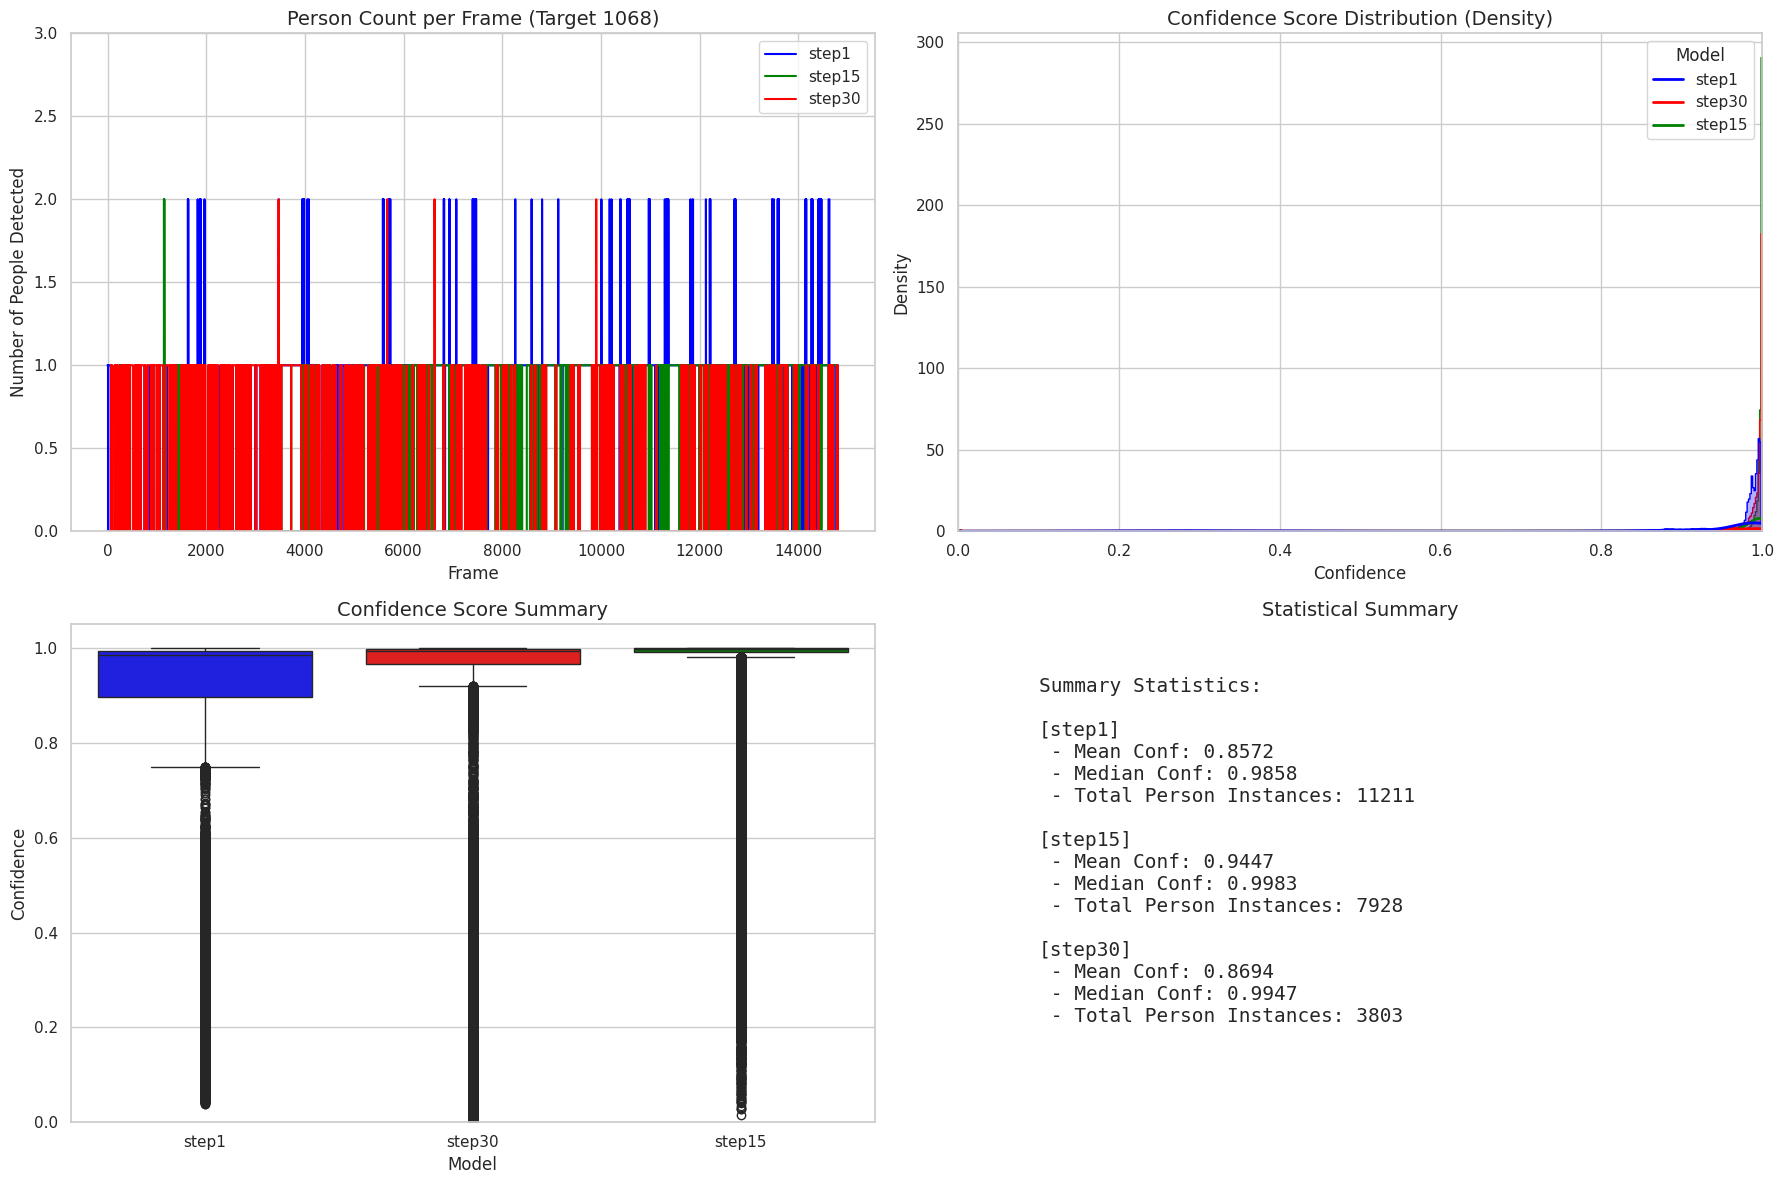

✅ 그래프 저장 완료: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_analysis_target1068.png


<Figure size 640x480 with 0 Axes>

In [22]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

# =========================================================
# 1. 설정 및 데이터 로드
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
target = 1068
JSON_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.json"

print(f"📂 데이터 로드 중: {JSON_PATH}")

if not JSON_PATH.exists():
    print("❌ JSON 파일이 존재하지 않습니다. 이전 코드를 먼저 실행해주세요.")
    exit()

with open(JSON_PATH, "r") as f:
    data = json.load(f)

# =========================================================
# 2. 데이터 가공 (DataFrame 변환)
# =========================================================
# (1) 사람 수 카운트 데이터
count_list = []
# (2) Confidence Score 데이터
conf_list = []

models = ["step1", "step15", "step30"]

for i, frame_data in enumerate(data):
    frame_idx = i
    preds = frame_data["predictions"]
    
    for model in models:
        # --- A. 사람 수 체크 ---
        people_list = preds.get(model, [])
        person_count = len(people_list)
        
        count_list.append({
            "Frame": frame_idx,
            "Model": model,
            "Count": person_count
        })
        
        # --- B. Confidence Score 수집 ---
        for person_kpts in people_list:
            # person_kpts는 [[x,y,conf], [x,y,conf], ...] 형태
            kpts_np = np.array(person_kpts)
            if len(kpts_np) > 0:
                # 3번째 값(인덱스 2)이 confidence
                confs = kpts_np[:, 2]
                for c in confs:
                    conf_list.append({
                        "Model": model,
                        "Confidence": c
                    })

# Pandas DataFrame으로 변환
df_count = pd.DataFrame(count_list)
df_conf = pd.DataFrame(conf_list)

# =========================================================
# 3. 시각화 (Plotting)
# =========================================================
# 스타일 설정
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 12))

# --- [그래프 1] 프레임별 감지된 사람 수 (Person Count) ---
plt.subplot(2, 2, 1)
sns.lineplot(data=df_count, x="Frame", y="Count", hue="Model", 
             palette={"step1": "blue", "step15": "green", "step30": "red"}, 
             drawstyle='steps-post') # 계단형 그래프로 변화 명확히 표현
plt.title(f"Person Count per Frame (Target {target})", fontsize=14)
plt.ylabel("Number of People Detected")
plt.ylim(0, max(df_count["Count"].max() + 1, 3)) # Y축 범위 조정
plt.legend(loc='upper right')

# --- [그래프 2] Confidence Score 분포 (Histogram & KDE) ---
plt.subplot(2, 2, 2)
sns.histplot(data=df_conf, x="Confidence", hue="Model", 
             palette={"step1": "blue", "step15": "green", "step30": "red"},
             element="step", fill=True, stat="density", common_norm=False, alpha=0.3)
sns.kdeplot(data=df_conf, x="Confidence", hue="Model", 
            palette={"step1": "blue", "step15": "green", "step30": "red"},
            fill=False, linewidth=2, warn_singular=False)
plt.title("Confidence Score Distribution (Density)", fontsize=14)
plt.xlim(0, 1.0)

# --- [그래프 3] Confidence Score Boxplot (통계 요약) ---
plt.subplot(2, 2, 3)
sns.boxplot(data=df_conf, x="Model", y="Confidence", 
            palette={"step1": "blue", "step15": "green", "step30": "red"})
plt.title("Confidence Score Summary", fontsize=14)
plt.ylim(0, 1.05)

# --- [그래프 4] 프레임별 평균 Confidence 변화 ---
# 프레임별, 모델별 평균 점수 계산
df_avg_conf = df_conf.copy()
# Frame 정보를 매핑하기 위해 df_count 구조 활용 (여기서는 간단히 처리)
# 정확한 매칭을 위해 다시 순회하지 않고, 위 loop에서 처리했어야 하지만
# 데이터가 많으므로 boxplot으로 충분하여 여기선 간단한 텍스트 요약 출력

plt.subplot(2, 2, 4)
plt.axis('off')
text_summary = "Summary Statistics:\n\n"
for model in models:
    subset = df_conf[df_conf["Model"] == model]["Confidence"]
    count_subset = df_count[df_count["Model"] == model]["Count"]
    
    avg_conf = subset.mean()
    median_conf = subset.median()
    total_detections = count_subset.sum() # 총 감지된 사람 수의 합 (누적)
    
    text_summary += f"[{model}]\n"
    text_summary += f" - Mean Conf: {avg_conf:.4f}\n"
    text_summary += f" - Median Conf: {median_conf:.4f}\n"
    text_summary += f" - Total Person Instances: {total_detections}\n\n"

plt.text(0.1, 0.5, text_summary, fontsize=14, va='center', family='monospace')
plt.title("Statistical Summary", fontsize=14)

plt.tight_layout()
plt.show()

# (선택) 그래프 이미지 저장
SAVE_PLOT_PATH = DATA_DIR / "test" / f"yolo_analysis_target{target}.png"
plt.savefig(SAVE_PLOT_PATH)
print(f"✅ 그래프 저장 완료: {SAVE_PLOT_PATH}")

In [26]:
import json
import pandas as pd
from pathlib import Path

# =========================================================
# 1. 설정 및 데이터 로드
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
target = 1068
JSON_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.json"

if not JSON_PATH.exists():
    print(f"❌ JSON 파일이 없습니다: {JSON_PATH}")
    exit()

print(f"📂 데이터 분석 중: {JSON_PATH.name}")

with open(JSON_PATH, "r") as f:
    data = json.load(f)

# =========================================================
# 2. 개수 집계
# =========================================================
models = ["step1", "step15", "step30"]
summary = []

for model in models:
    total_kpts = 0      # 전체 관절 포인트 수
    low_conf_count = 0  # 0.5 이하인 포인트 수
    
    for frame in data:
        # 해당 모델의 예측 결과 가져오기
        predictions = frame["predictions"].get(model, [])
        
        for person in predictions:
            # person은 [[x, y, conf], [x, y, conf], ...] 형태 (12개)
            for kpt in person:
                conf = kpt[2]
                total_kpts += 1
                
                # [조건] Confidence 0.5 이하 체크
                if conf <= 0.07:
                    low_conf_count += 1
    
    # 비율 계산
    ratio = (low_conf_count / total_kpts * 100) if total_kpts > 0 else 0
    
    summary.append({
        "Model": model,
        "Low Conf (<= 0.5) Count": low_conf_count,
        "Total Keypoints": total_kpts,
        "Ratio (%)": round(ratio, 2)
    })

# =========================================================
# 3. 결과 출력
# =========================================================
df_result = pd.DataFrame(summary)

print("\n📊 [분석 결과] Confidence Score 0.5 이하인 Keypoint 개수")
print("=" * 60)
print(df_result)
print("=" * 60)

# 가장 안정적인 모델 추천
best_model = df_result.sort_values("Low Conf (<= 0.5) Count").iloc[0]
print(f"💡 결론: '{best_model['Model']}' 모델이 불확실한(0.5 이하) 관절이 가장 적습니다.")

📂 데이터 분석 중: yolo_comparison_3models_target1068.json

📊 [분석 결과] Confidence Score 0.5 이하인 Keypoint 개수
    Model  Low Conf (<= 0.5) Count  Total Keypoints  Ratio (%)
0   step1                      120           134532       0.09
1  step15                       24            95136       0.03
2  step30                      568            45636       1.24
💡 결론: 'step15' 모델이 불확실한(0.5 이하) 관절이 가장 적습니다.


In [27]:
import cv2
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json

# =========================================================
# 1. 설정 및 경로
# =========================================================
DATA_DIR = Path("/workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data")
CSV_PATH = DATA_DIR / "metadata.csv"
target = 1068

# 입력 JSON 파일 경로 (이전 단계에서 생성된 파일)
INPUT_JSON_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}.json"

# 출력 비디오 파일 경로
OUTPUT_VIDEO_PATH = DATA_DIR / "test" / f"yolo_comparison_3models_target{target}_all_skeletons.mp4"

# CSV 및 JSON 로드
try:
    df = pd.read_csv(CSV_PATH)
    COMMON_PATH = df.loc[target, "common_path"]
    FRAME_DIR = DATA_DIR / "1_FRAME" / COMMON_PATH
except (FileNotFoundError, KeyError) as e:
    print(f"❌ 데이터 로드 실패: {e}")
    exit()

if not INPUT_JSON_PATH.exists():
    print(f"❌ JSON 파일이 없습니다: {INPUT_JSON_PATH}\n먼저 추론 코드를 실행해주세요.")
    exit()

print(f"📂 JSON 데이터 로드 중: {INPUT_JSON_PATH.name}")
with open(INPUT_JSON_PATH, "r") as f:
    json_data = json.load(f)

# =========================================================
# 2. 그리기 설정 (색상 및 연결 정보)
# =========================================================
# 모델별 색상 정의 (BGR: Blue, Green, Red)
COLORS = {
    "step1": (255, 0, 0),    # 파랑
    "step15": (0, 255, 0),   # 초록
    "step30": (0, 0, 255)    # 빨강
}

# 스켈레톤 연결 (12 Keypoints: 0~11)
SKELETON_CONNECTIONS = [
    (0, 1), (0, 2), (2, 4), (1, 3), (3, 5),
    (0, 6), (1, 7), (6, 7),
    (6, 8), (8, 10), (7, 9), (9, 11)
]

# =========================================================
# 3. 이미지 준비 및 비디오 설정
# =========================================================
if not FRAME_DIR.exists():
    print(f"❌ 프레임 폴더가 없습니다: {FRAME_DIR}")
    exit()

image_files = list(FRAME_DIR.glob("*.jpg"))
try:
    image_files.sort(key=lambda p: int(p.stem.replace("frame_", "")))
except ValueError:
    image_files.sort()

if not image_files:
    print("❌ 이미지가 없습니다.")
    exit()

# 데이터 정합성 체크

if len(image_files) != len(json_data):
    print(f"⚠️ 경고: 이미지 수({len(image_files)})와 JSON 데이터 수({len(json_data)})가 다릅니다.")

first_frame = cv2.imread(str(image_files[0]))
h, w, _ = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(OUTPUT_VIDEO_PATH), fourcc, 30.0, (w, h))

print(f"🚀 모든 스켈레톤 그리기 시작 (Conf 무시): {OUTPUT_VIDEO_PATH.name}")

# =========================================================
# 4. 프레임별 그리기 Loop (JSON 데이터 기반)
# =========================================================
# JSON 데이터와 이미지 파일을 동시에 순회
for i, img_path in enumerate(tqdm(image_files)):
    # 인덱스 초과 방지
    if i >= len(json_data): break
    
    frame = cv2.imread(str(img_path))
    frame_data = json_data[i] # 현재 프레임의 JSON 데이터 가져오기
    
    # predictions 딕셔너리 확인 (모델별 결과가 들어있음)
    predictions = frame_data.get("predictions", {})
    
    for model_name, people_list in predictions.items():
        color = COLORS.get(model_name, (255, 255, 255)) # 모델 색상 가져오기
        
        # 해당 모델이 감지한 모든 사람에 대해 반복
        for person_kpts in people_list:
            # person_kpts: [[x, y, conf], [x, y, conf], ...] (리스트 형태)
            
            # (A) 뼈대(Line) 그리기 - Confidence 조건 없이 무조건 연결
            for connection in SKELETON_CONNECTIONS:
                start_idx, end_idx = connection
                
                # 데이터 유효성 체크
                if start_idx >= len(person_kpts) or end_idx >= len(person_kpts):
                    continue
                    
                kp_start = person_kpts[start_idx]
                kp_end = person_kpts[end_idx]
                
                # 좌표가 0,0 인 경우(미검출) 제외할 수도 있지만, 요청대로 다 그립니다.
                pt1 = (int(kp_start[0]), int(kp_start[1]))
                pt2 = (int(kp_end[0]), int(kp_end[1]))
                
                # 선 그리기 (두께 2)
                cv2.line(frame, pt1, pt2, color, 2, cv2.LINE_AA)
            
            # (B) 관절(Point) 그리기 - Confidence 조건 없이 무조건 표시
            for kp in person_kpts:
                x, y, conf = kp # conf는 사용하지 않음
                # 원 그리기 (반지름 3)
                cv2.circle(frame, (int(x), int(y)), 3, color, -1)

    # 5. 범례(Legend) 추가
    cv2.rectangle(frame, (10, 10), (250, 110), (255, 255, 255), -1)
    cv2.rectangle(frame, (10, 10), (250, 110), (0, 0, 0), 1)
    
    y_pos = 40
    for name, color in COLORS.items():
        cv2.circle(frame, (30, y_pos - 5), 6, color, -1)
        cv2.putText(frame, name, (50, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        y_pos += 30

    # 6. 영상 저장
    out.write(frame)

# =========================================================
# 5. 종료
# =========================================================
out.release()
print(f"✅ 완료! 영상 저장됨: {OUTPUT_VIDEO_PATH}")

📂 JSON 데이터 로드 중: yolo_comparison_3models_target1068.json
🚀 모든 스켈레톤 그리기 시작 (Conf 무시): yolo_comparison_3models_target1068_all_skeletons.mp4


100% 14805/14805 [05:03<00:00, 48.82it/s]


✅ 완료! 영상 저장됨: /workspace/nas203/ds_RehabilitationMedicineData/IDs/tojihoo/data/test/yolo_comparison_3models_target1068_all_skeletons.mp4
